### Name : Shobhit Mirjankar
### Batch : C32
### Roll No : 1902101

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Reading the dataset

dataset = pd.read_csv('dataset.csv')
dataset

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


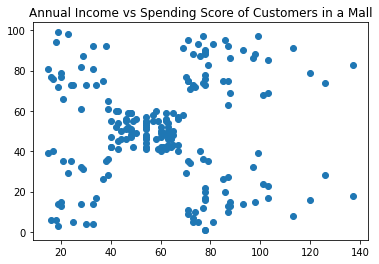

In [3]:
# Visualizing the dataset

plt.scatter(dataset['Annual Income (k$)'],dataset['Spending Score (1-100)'])
plt.title('Annual Income vs Spending Score of Customers in a Mall')
plt.show()

# Preparing Edge Table

In [4]:
# Computing edge distance for each pair of nodes

def euclidean(x,y):
    return np.linalg.norm(x - y)

def compute_edge_table(dataset):
    edge_table = pd.DataFrame(columns=['u', 'v', 'distance'])
    for i,node1 in dataset.iterrows():
        for j,node2 in dataset.loc[i+1:].iterrows():
            dist = np.round(euclidean(node1,node2),4)   
            edge_table.loc[len(edge_table)] = [i,j,dist]
    edge_table = edge_table.astype({"u":"int","v":"int"})
    return edge_table


edge_table = compute_edge_table(dataset)
print('Edge Table : ')
edge_table

Edge Table : 


,u,v,distance
0,0,1,42.0000
1,0,2,33.0151
2,0,3,38.0132
3,0,4,2.2361
4,0,5,37.0540
...,...,...,...
19895,196,198,14.8661
19896,196,199,56.0892
19897,197,198,57.0701
19898,197,199,14.2127


In [5]:
# Sorting Edge Table in ascending order of distances

edge_table = edge_table.sort_values(by=['distance'])
print('Sorted Edge Table : ')
edge_table

Sorted Edge Table : 


,u,v,distance
8424,48,49,0.0000
10857,65,68,0.0000
17416,129,131,0.0000
18955,156,158,0.0000
15627,107,113,1.0000
...,...,...,...
1562,7,198,141.1984
1371,6,199,141.7392
1754,8,199,142.5623
2320,11,198,143.1258


# Kruskal's Algorithm for Minimum Spanning Tree

In [6]:
# Disjoint Set Operations for implementing Kruskal's Algorithm

rank = [0 for _ in range(len(dataset))]
parent = [i for i in range(len(dataset))]

def find_parent(u):
    if u == parent[u]:
        return u
    parent[u] = find_parent(parent[u])
    return parent[u]

def union(u,v):
    u = find_parent(u)
    v = find_parent(v)
    if rank[u] < rank[v]:
        parent[u] = v
    elif rank[v] < rank[u]:
        parent[v] = u
    else:
        parent[u] = v
        rank[v] += 1

In [7]:
# Kruskal's Algorithm for finding Minimum Spanning Tree

def kruskal(dataset,edge_table,num_of_clusters):
    edges_needed = len(dataset) - num_of_clusters
    edges_added = 0
    for index,row in edge_table.iterrows():
        u = int(row.u)
        v = int(row.v)
        if find_parent(u) != find_parent(v):
            union(u,v)
            edges_added += 1
            if edges_added == edges_needed:
                break
    for index,row in dataset.iterrows():
        parent[int(index)] = find_parent(int(index))

# Clustering using Minimum Spanning Tree

In [8]:
# Performing Clustering using MST and visualizing clusters

def MST_Clustering(dataset,k):
    dataset['cluster'] = 0
    kruskal(dataset,edge_table,k)
    
    for index,row in dataset.iterrows():
        dataset['cluster'][index] = parent[int(index)]
    dataset['cluster'] = pd.factorize(dataset['cluster'])[0]
    return dataset

def visualize_clusters(result):
    k = len(dataset['cluster'].unique())
    for i in range(k):
        plt.scatter(result[result['cluster']==i]['Annual Income (k$)'],
                    result[result['cluster']==i]['Spending Score (1-100)'],
                   label = 'Cluster '+ str(i+1))
    plt.title('Clusters formed using MST')
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.legend()
    plt.show()

In [9]:
# Forming 7 clusters

rank = [0 for _ in range(len(dataset))]
parent = [i for i in range(len(dataset))]
k = int(input('Enter number of clusters : '))
result = MST_Clustering(dataset,k)
result

Enter number of clusters : 7


,Annual Income (k$),Spending Score (1-100),cluster
0,15,39,0
1,15,81,0
2,16,6,0
3,16,77,0
4,17,40,0
...,...,...,...
195,120,79,3
196,126,28,4
197,126,74,3
198,137,18,5


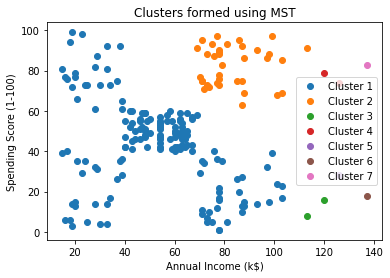

In [10]:
# Visualizing 7 clusters

visualize_clusters(result)

In [11]:
# Forming 10 clusters

rank = [0 for _ in range(len(dataset))]
parent = [i for i in range(len(dataset))]
k = int(input('Enter number of clusters : '))
result = MST_Clustering(dataset,k)
result

Enter number of clusters : 10


,Annual Income (k$),Spending Score (1-100),cluster
0,15,39,0
1,15,81,0
2,16,6,0
3,16,77,0
4,17,40,0
...,...,...,...
195,120,79,6
196,126,28,7
197,126,74,6
198,137,18,8


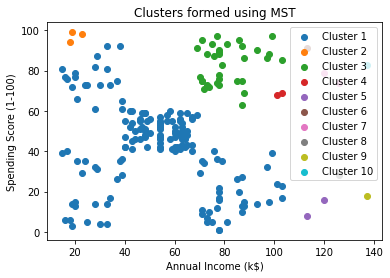

In [12]:
# Visualizing 10 clusters

visualize_clusters(result)